In [ ]:
from datetime import datetime, date, timedelta
from contextlib import closing
from tqsdk import TqApi, TqAuth
import pandas as pd
api = TqApi(auth=TqAuth("账号", "密码"))

在使用天勤量化之前，默认您已经知晓并同意以下免责条款，如果不同意请立即停止使用：https://www.shinnytech.com/blog/disclaimer/


2025-05-23 14:15:22 -     INFO - TqSdk trial 版剩余 14 天到期，如需续费或升级请访问 https://account.shinnytech.com/ 或联系相关工作人员。


2025-05-23 14:15:54 -     INFO - 通知 : 与 wss://api.shinnytech.com/t/nfmd/front/mobile 的网络连接已建立


In [ ]:
import os
import sys
__file__ = 'calculate.ipynb'
import RiceQuantDB as rqdb


rq = rqdb.DominantContractAnalyzer(future_symbol='PR')
pr_list = rq.get_dominant_contract(start_date='2024-8-30')
pr_list

e:\FourBung_Quant\tqDemo\.venv\Lib\site-packages\rqdatac\client.py:257: UserWarning: Your account will be expired after  16 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "
e:\FourBung_Quant\tqDemo\.venv\Lib\site-packages\rqdatac\services\get_price.py:221: UserWarning: start_date is earlier than 2000-01-04, adjusted to 2000-01-04
  warnings.warn("start_date is earlier than 2000-01-04, adjusted to 2000-01-04")
e:\FourBung_Quant\tqDemo\.venv\Lib\site-packages\rqdatac\services\get_price.py:221: UserWarning: start_date is earlier than 2000-01-04, adjusted to 2000-01-04
  warnings.warn("start_date is earlier than 2000-01-04, adjusted to 2000-01-04")
e:\FourBung_Quant\tqDemo\.venv\Lib\site-packages\rqdatac\services\get_price.py:221: UserWarning: start_date is earlier than 2000-01-04, adjusted to 2000-01-04
  warnings.warn("start_date is earlier than 2000-01-04, adjusted to 2000-01-04")
e:\Four

,main
date,
2025-05-22,2507
2025-05-21,2507
2025-05-20,2507
2025-05-19,2507
2025-05-16,2507
...,...
2024-09-05,2503
2024-09-04,2503
2024-09-03,2503


In [3]:
# 求pr加工费
sym = ['CZCE.PR','CZCE.TA','DCE.eg']
def calculate(api,day):
    month = pr_list.loc[str(day)]['main']
    pr = api.get_kline_data_series(symbol=f'{sym[0]}{month[-3:]}',duration_seconds=1,start_dt=day,end_dt=day)
    ta = api.get_kline_data_series(symbol=f'{sym[1]}{month[-3:]}',duration_seconds=1,start_dt=day,end_dt=day)
    eg = api.get_kline_data_series(symbol=f'{sym[2]}{month}',duration_seconds=1,start_dt=day,end_dt=day)
    # pr = api.get_kline_data_series(symbol=sym[3],duration_seconds=1,start_dt=day,end_dt=day)
    new_df = pd.DataFrame({
        'datetime': pd.to_datetime(pr['datetime']),
        'pr': pr['close'],
        'ta': ta['close'],
        'eg': eg['close'],
        'pr_fee': pr['close'] - 0.857 * ta['close'] - 0.335 * eg['close'],
        # 'pf_fee': pf['close'] - 0.857 * ta['close'] - 0.335 * eg['close']
    })
    return new_df['pr_fee'].max(), new_df['pr_fee'].min()

In [4]:
import csv
filename  = "pr_fee.csv"
start_date = date(2024, 8, 30)
end_date = date(2025, 5, 22)

cld = api.get_trading_calendar(start_dt=date(2020, 1, 1), end_dt=date(2025, 12, 31))
cld.set_index('date', inplace=True)
cld.loc[str(date(2020, 1, 1))]['trading']

current_date = start_date
while current_date <= end_date:
    if cld.loc[str(current_date)]['trading']: 
        max ,min = calculate(api, current_date)
        with open(filename, 'a', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            formatted_max = "{:.2f}".format(round(max, 2))  # 30.46
            formatted_min = "{:.2f}".format(round(min, 2))
            row = [current_date.strftime('%Y-%m-%d'), formatted_max, formatted_min]
            if csvfile.tell() == 0:
                writer.writerow(["Date", "Max", "Min"])
            writer.writerow(row)

        print(f'{current_date.strftime('%Y-%m-%d')} 处理完成') 
    else:
        print(f'{current_date.strftime('%Y-%m-%d')} 不是交易日')
    current_date += timedelta(days=1) 

2024-08-30 处理完成
2024-08-31 不是交易日
2024-09-01 不是交易日
2024-09-02 处理完成
2024-09-03 处理完成
2024-09-04 处理完成
2024-09-05 处理完成
2024-09-06 处理完成
2024-09-07 不是交易日
2024-09-08 不是交易日
2024-09-09 处理完成
2024-09-10 处理完成
2024-09-11 处理完成
2024-09-12 处理完成
2024-09-13 处理完成
2024-09-14 不是交易日
2024-09-15 不是交易日
2024-09-16 不是交易日
2024-09-17 不是交易日
2024-09-18 处理完成
2024-09-19 处理完成
2024-09-20 处理完成
2024-09-21 不是交易日
2024-09-22 不是交易日
2024-09-23 处理完成
2024-09-24 处理完成
2024-09-25 处理完成
2024-09-26 处理完成
2024-09-27 处理完成
2024-09-28 不是交易日
2024-09-29 不是交易日
2024-09-30 处理完成
2024-10-01 不是交易日
2024-10-02 不是交易日
2024-10-03 不是交易日
2024-10-04 不是交易日
2024-10-05 不是交易日
2024-10-06 不是交易日
2024-10-07 不是交易日
2024-10-08 处理完成
2024-10-09 处理完成
2024-10-10 处理完成
2024-10-11 处理完成
2024-10-12 不是交易日
2024-10-13 不是交易日
2024-10-14 处理完成
2024-10-15 处理完成
2024-10-16 处理完成
2024-10-17 处理完成
2024-10-18 处理完成
2024-10-19 不是交易日
2024-10-20 不是交易日
2024-10-21 处理完成
2024-10-22 处理完成
2024-10-23 处理完成
2024-10-24 处理完成
2024-10-25 处理完成
2024-10-26 不是交易日
2024-10-27 不是交易日
2024-10-28 处理完成
2024-10-29 处理完成

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

def plot_frequency_distribution(pr,day):
    pr[f'{day}日最高'] = pr['high'].rolling(window=day, min_periods=day).max()
    pr[f'{day}日最低'] = pr['low'].rolling(window=day, min_periods=day).min()
    pr[f'{day}日波动'] = pr[f'{day}日最高'] - pr[f'{day}日最低']
    # 定义分箱规则
    if day < 5:
        bins = list(range(0, 101, 10)) + [float('inf')]  # 0,10,20,...,100,inf
        labels = [
            '0-9', '10-19', '20-29', '30-39', '40-49',
            '50-59', '60-69', '70-79', '80-89', '90-99',
            '≥100'
        ]
    else:
        bins = [0, 30, 40, 50, 60, 70, 80, 90, 140, 190, 240, 300, float('inf')]
        labels = [
            '0-29', '30-39', '40-49','50-59', '60-69', '70-79', '80-89', 
            '90-139', '140-189', '190-239', '240-299', 
            '≥300'
        ]

    
    df = pr.copy()
    # 执行分箱操作
    df['波动区间'] = pd.cut(
        df[f'{day}日波动'],
        bins=bins,
        labels=labels,
        right=False  # 左闭右开区间，10会被分到10-19区间
    )

    # 统计区间频率
    frequency = df['波动区间'].value_counts().sort_index().reset_index()
    frequency.columns = ['波动区间', '出现次数']
    frequency['频率占比'] = (frequency['出现次数'] / len(df)) * 100
    # 创建画布
    plt.figure(figsize=(14, 7))
    plt.subplots_adjust(bottom=0.25)  # 底部留白

    # 绘制柱状图
    bars = plt.bar(
        frequency['波动区间'],
        frequency['出现次数'],
        color=plt.cm.viridis(np.linspace(0, 1, len(labels))),  # 渐变色
        edgecolor='black',
        width=0.8
    )

    # 添加频率标签
    for bar, pct in zip(bars, frequency['频率占比']):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.5,
            f'{pct:.1f}%' if pct > 0 else '',
            ha='center',
            va='bottom',
            fontsize=10,
            rotation=45,
            color='navy'
        )

    # 坐标轴优化
    plt.xticks(
        rotation=45,
        ha='right',
        fontsize=10,
        fontfamily='DejaVu Sans',
        color='#333333'
    )
    plt.yticks(np.arange(0, frequency['出现次数'].max()*1.2, 5))

    # 添加辅助元素
    plt.title(f'pr加工费波动区间分布分析（{day}日波动）', pad=20, fontsize=14)
    plt.xlabel('波动区间（单位：元）', labelpad=15)
    plt.ylabel('出现次数', labelpad=15)
    plt.grid(axis='y', alpha=0.3)
    plt.legend()

    # 添加统计摘要
    stats_text = f"""
    数据统计摘要：
    - 总交易日数：{len(df)}天
    - 平均波动：{df[f'{day}日波动'].mean():.2f}元
    - 最大波动：{df[f'{day}日波动'].max():.2f}元
    - 最小波动：{df[f'{day}日波动'].min():.2f}元
    """
    plt.text(
        0.8, 0.8,
        stats_text,
        transform=plt.gca().transAxes,
        # ha='left',
        # va='top',
        fontsize=10,
        bbox=dict(facecolor='#f0f0f0', alpha=0.5)
    )

    plt.tight_layout()
    plt.show()

C:\Users\zhang\AppData\Local\Temp\ipykernel_32076\4245359814.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


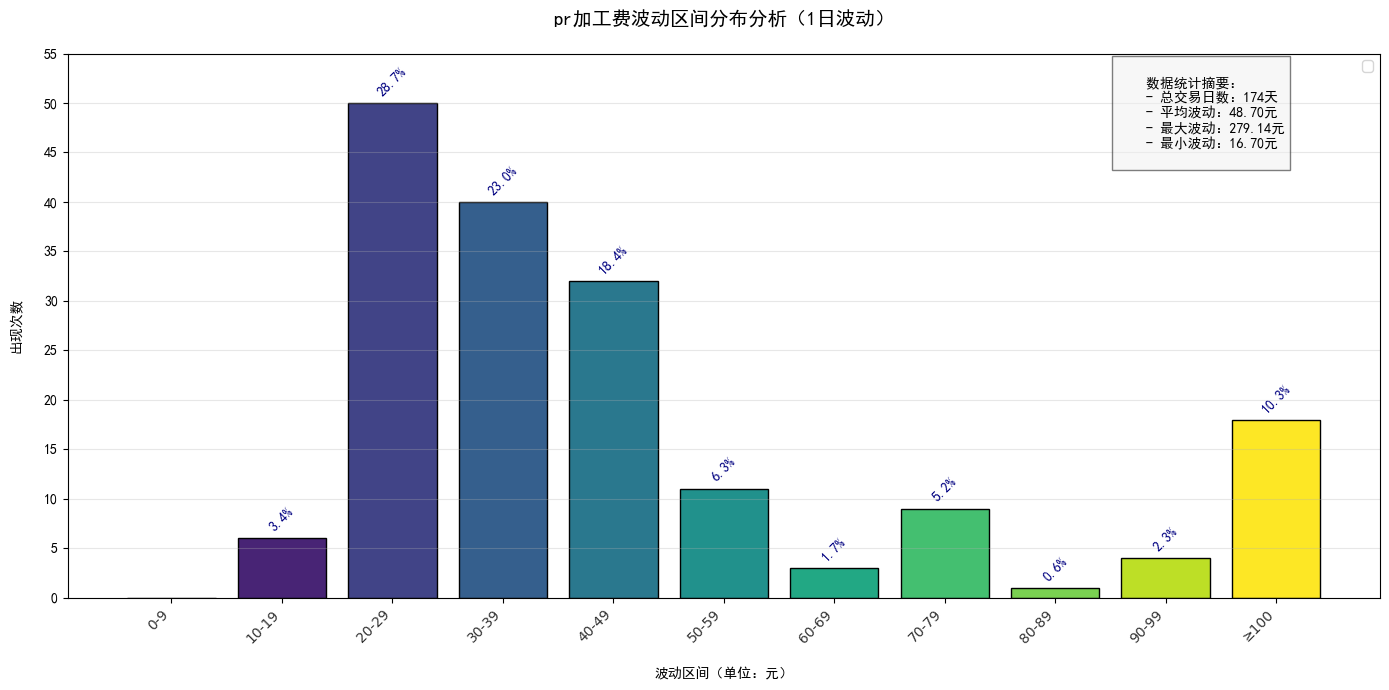

C:\Users\zhang\AppData\Local\Temp\ipykernel_32076\4245359814.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


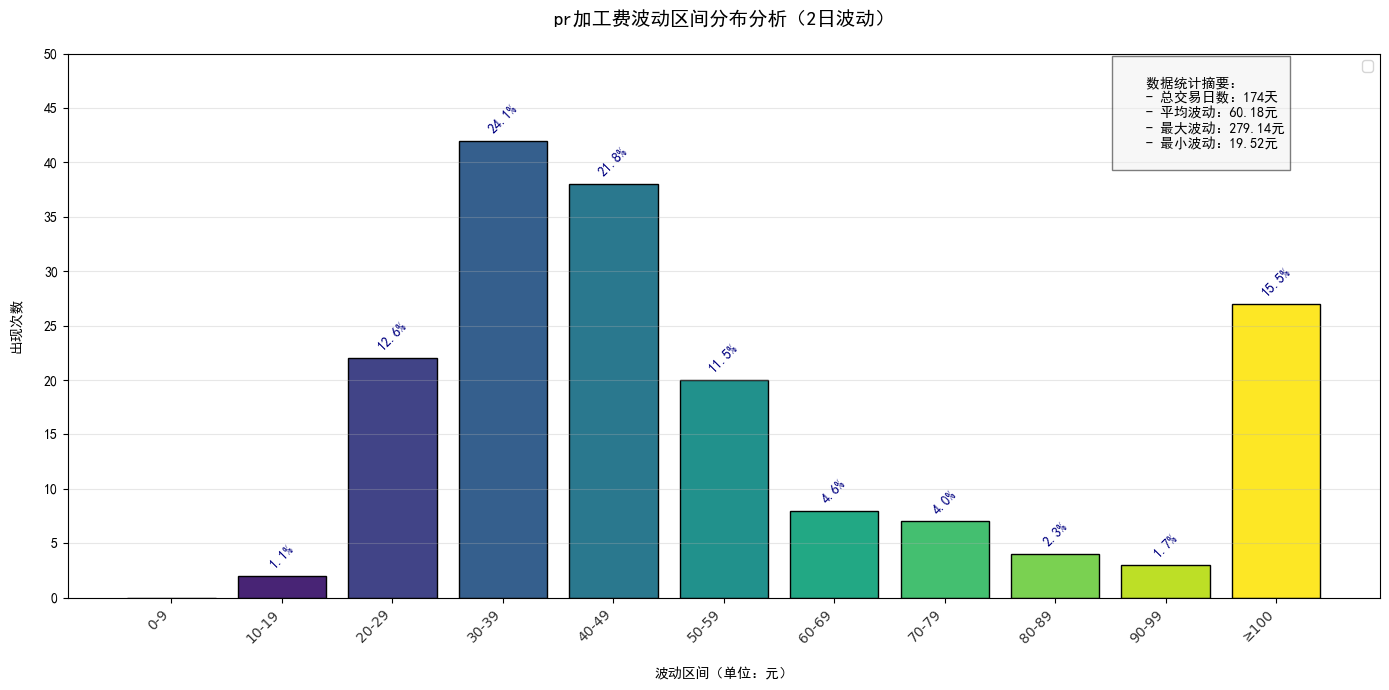

C:\Users\zhang\AppData\Local\Temp\ipykernel_32076\4245359814.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


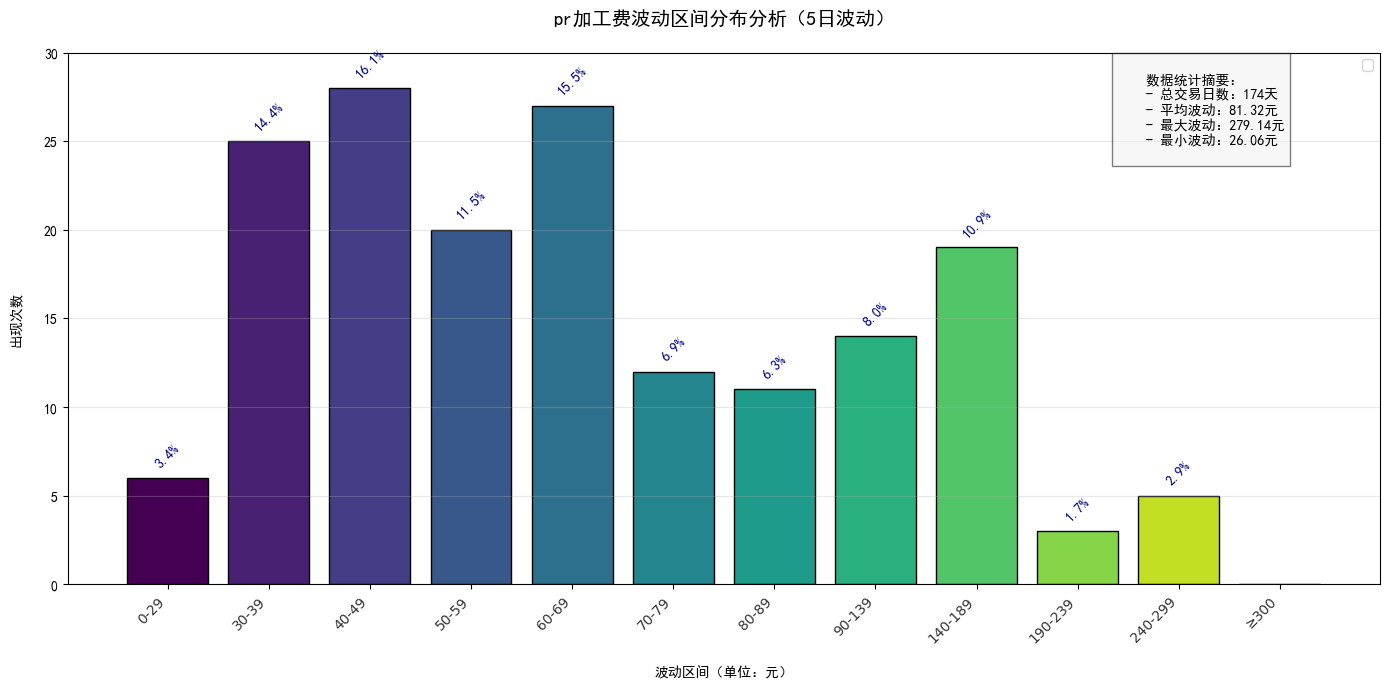

C:\Users\zhang\AppData\Local\Temp\ipykernel_32076\4245359814.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


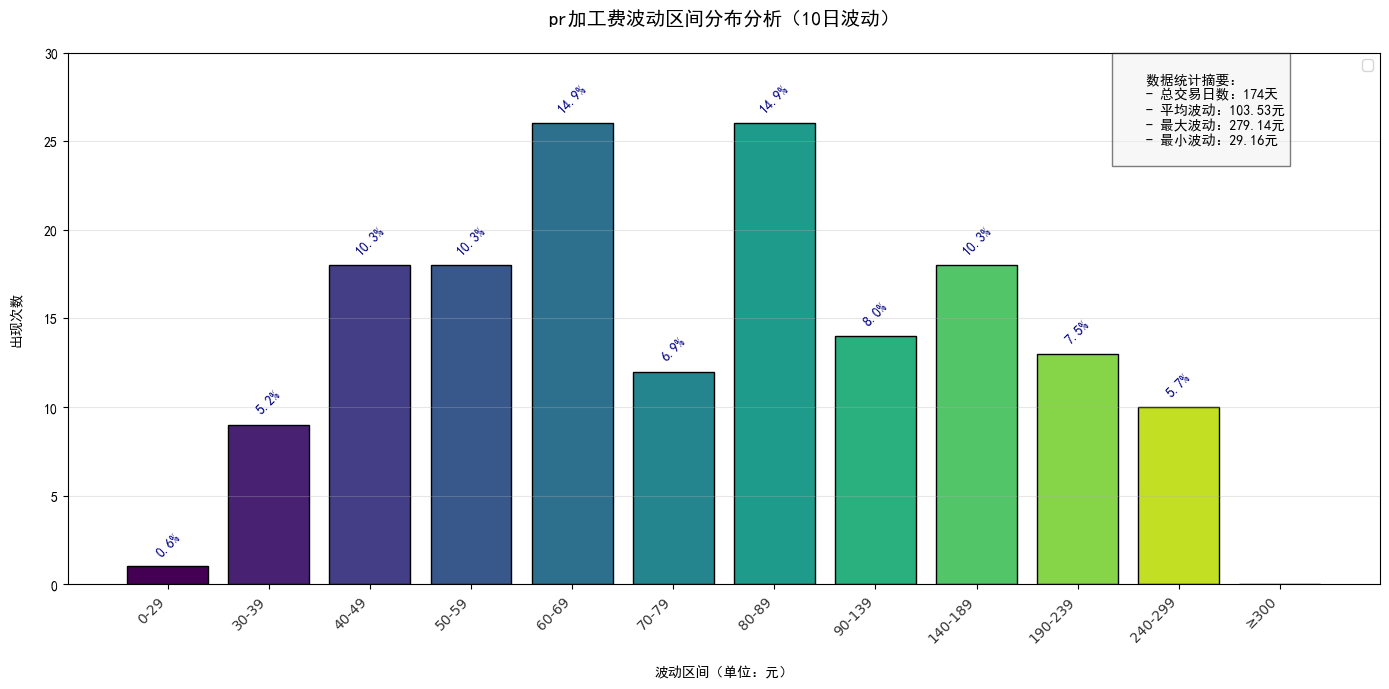

C:\Users\zhang\AppData\Local\Temp\ipykernel_32076\4245359814.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


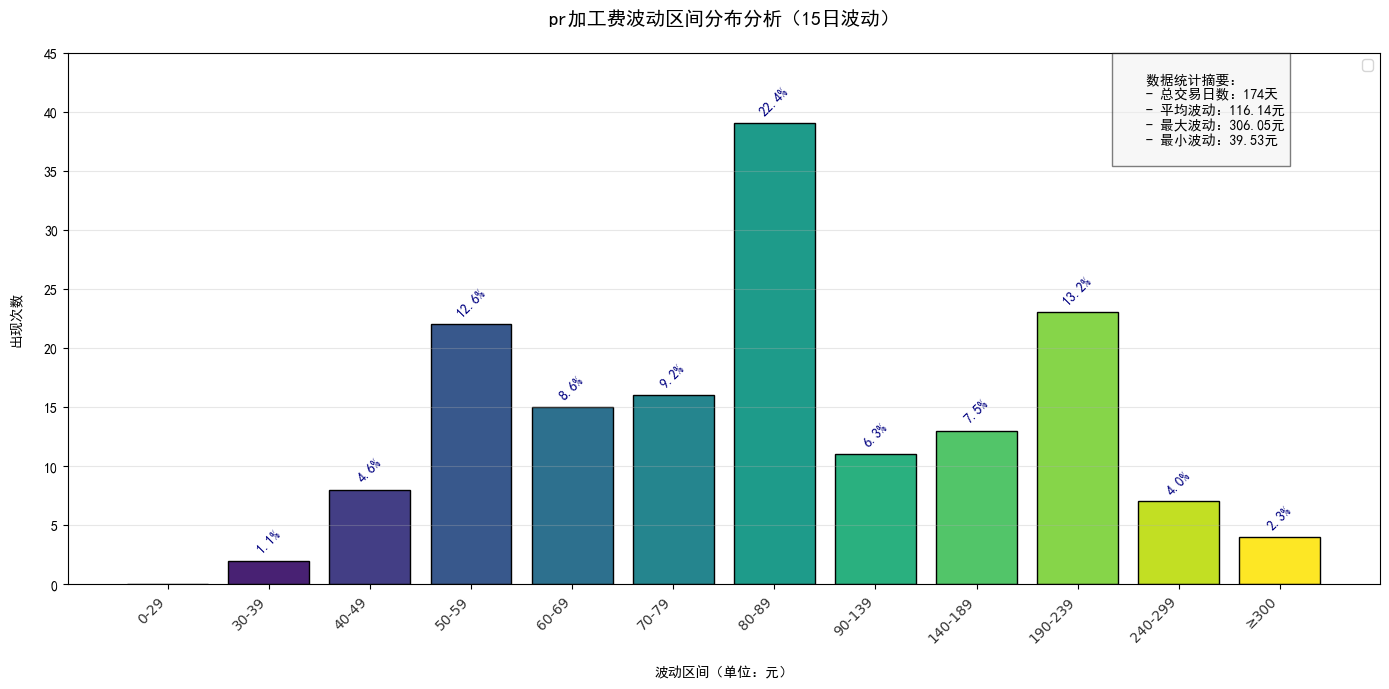

C:\Users\zhang\AppData\Local\Temp\ipykernel_32076\4245359814.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


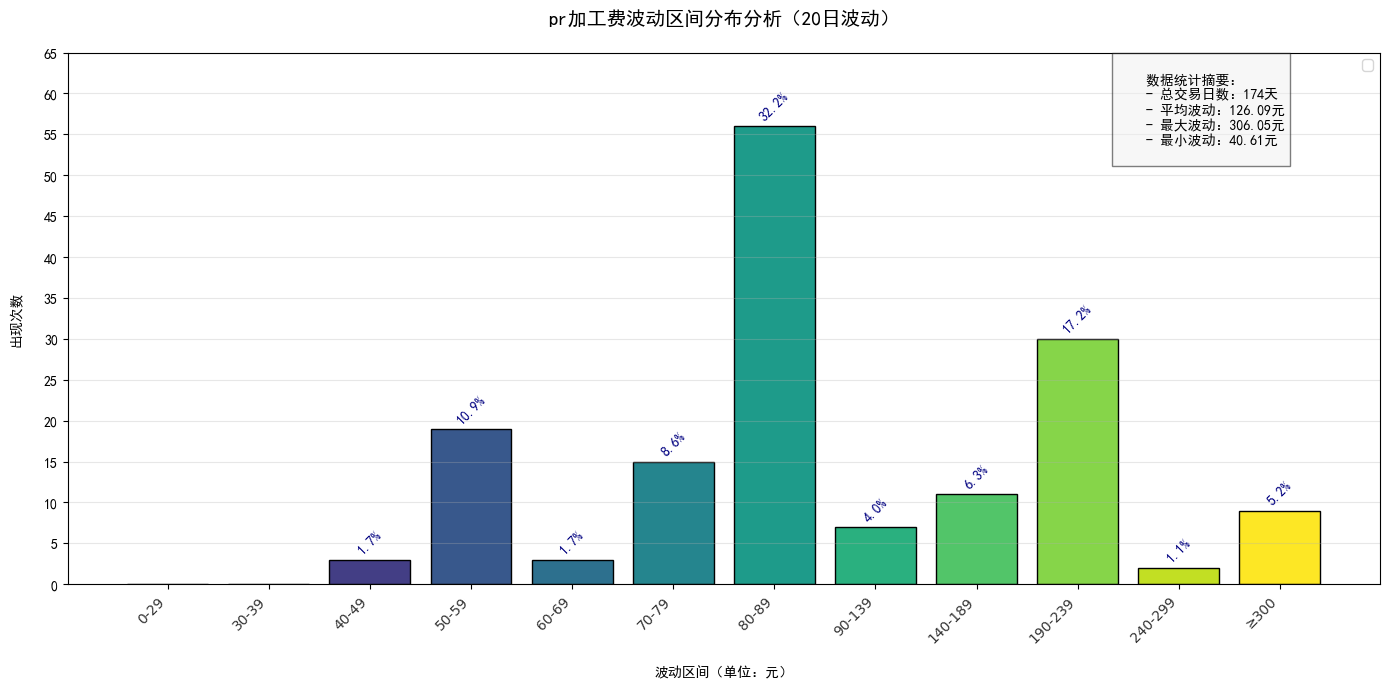

In [34]:
# 求波幅
import pandas as pd

# 读取数据并按照时间升序排序
df = pd.read_csv("pr_fee.csv")
df['date'] = pd.to_datetime(df['date'])
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df = df.sort_values('date').set_index('date') 
for i in [1,2,5,10,15,20]:
    plot_frequency_distribution(df,i)